In [1]:
import pandas as pd

import tqdm

In [2]:
import glob 

In [3]:
import matplotlib.pyplot as plt
import matplotlib

In [4]:
import matplotlib.colors as colors

In [5]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [6]:
import numpy as np

In [7]:
font = {'family': 'serif',
        'weight': 'bold',
        'size': 10,
        }

In [8]:
matplotlib.rc('font', **font)

**Clean data**

In [9]:
in_columns = ["y", "p", "q", "average cooperation rate", "average score", "t"]

**Clean based on $b$**

In [10]:
bs = range(1, 11)

In [11]:
csv_files = [f'../matlab/data/expected/clean_c_1_b_{b}_stochastic_0.csv' for b in bs]
csv_files_stoch = [f'../data/clean_last_round_b_{b}.csv' for b in bs]

In [12]:
import re

start = 'b_'
end = '_stochastic'

In [13]:
dfs = []

for file in csv_files:
    df = pd.read_csv(file)
    df['b'] = result = re.search('%s(.*)%s' % (start, end), file).group(1)
    
    dfs.append(df)

In [14]:
points_p = []
points_q = []

for df in dfs[1:]:
    ps, qs = [], []
    for p, q, v in zip(df["p"], df["q"], df["frequencies"]):
        for _ in range(int(v)):
            ps.append(p)
            qs.append(q)
            
    points_p.append(ps)
    points_q.append(qs)

In [15]:
heatmaps = []
extents = []
for p, q in zip(points_p, points_q):

    heatmap, xedges, yedges = np.histogram2d(p, q, bins=19)

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    
    heatmaps.append(heatmap)
    extents.append(extent)

In [16]:
min_ = min([heatmap.min() for heatmap in heatmaps])

max_ = max([heatmap.max() for heatmap in heatmaps])

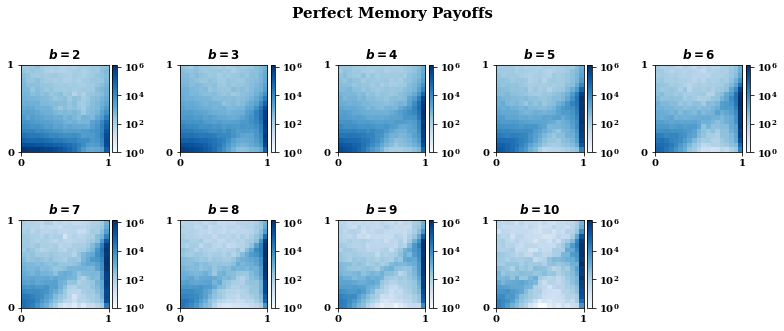

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(11, 5))

for i, heatmap in enumerate(heatmaps):
    
    index = (int(i / 5), i % 5)

    im = axes[index].imshow(heatmap.T, extent=extents[i], origin="lower",
                            cmap=matplotlib.cm.get_cmap("Blues"),
                            norm=colors.LogNorm(vmin=min_,
                                                vmax=max_))

    divider = make_axes_locatable(axes[index])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')

    axes[index].set_title(f"$b={dfs[i + 1]['b'].unique()[0]}$", weight="bold");
    axes[index].set_xticks(np.linspace(0, 1, 2))
    axes[index].set_yticks(np.linspace(0, 1, 2))

fig.suptitle('Perfect Memory Payoffs', weight="bold", fontsize=15)
plt.tight_layout();

fig.delaxes(axes[(1, 4)]);

plt.savefig("../static/expected_for_beta.pdf", bbox_inches='tight')

In [22]:
end = '.csv'

In [25]:
dfs_stoch = []

for file in csv_files_stoch[1:]:
    df = pd.read_csv(file)
    df['b'] = result = re.search('%s(.*)%s' % (start, end), file).group(1)
    
    dfs_stoch.append(df)

In [26]:
points_p_st = []
points_q_st = []

for df in dfs_stoch:
    ps, qs = [], []
    for p, q, v in zip(df["p"], df["q"], df["frequencies"]):
        for _ in range(int(v)):
            ps.append(p)
            qs.append(q)
            
    points_p_st.append(ps)
    points_q_st.append(qs)

In [27]:
heatmaps = []
extents = []
for p, q in zip(points_p_st, points_q_st):

    heatmap, xedges, yedges = np.histogram2d(p, q, bins=19)

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    
    heatmaps.append(heatmap)
    extents.append(extent)

In [149]:
min_ = min([heatmap.min() for heatmap in heatmaps])

max_ = max([heatmap.max() for heatmap in heatmaps])

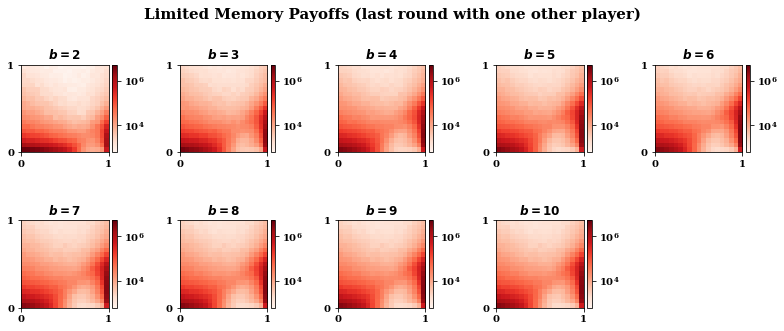

In [31]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(11, 5))

for i, heatmap in enumerate(heatmaps):
    index = (int(i / 5), i % 5)

    im = axes[index].imshow(heatmap.T, 
                            extent=extents[i],
                            origin="lower", 
                            cmap=matplotlib.cm.get_cmap("Reds"),
                            norm=colors.LogNorm(vmin=min_,
                                                 vmax=max_))
    
    divider = make_axes_locatable(axes[index])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')
    
    axes[index].set_title(f"$b={dfs_stoch[i]['b'].unique()[0]}$", weight="bold");
    axes[index].set_xticks(np.linspace(0, 1, 2))
    axes[index].set_yticks(np.linspace(0, 1, 2))

fig.suptitle('Limited Memory Payoffs (last round with one other player)', weight="bold", fontsize=15)

plt.tight_layout();

fig.delaxes(axes[(1, 4)]);

plt.savefig("../static/stochastic_for_beta.pdf", bbox_inches='tight')

In [53]:
cooperation_rates = []
cooperation_rates_expected = []

In [54]:
for df in dfs:
    cooperation_rates_expected.append(sum(df['average cooperation rate'] * (df['frequencies'] / 10 ** 7)))

In [55]:
for df in dfs_stoch:
    cooperation_rates.append(sum(df['average cooperation rate'] * (df['frequencies'] / sum(df['frequencies'] ))))

In [56]:
reds = matplotlib.cm.get_cmap("Reds")
blues = matplotlib.cm.get_cmap("Blues")

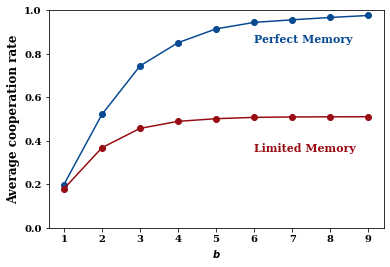

In [85]:
fig, axes = plt.subplots()

axes.plot(range(1, 10), cooperation_rates_expected[1:], "-o", color=blues(0.9), label="expected");
axes.plot(range(1, 10), cooperation_rates, "-o", color=reds(.9), label="stochastic");

axes.set_ylabel('Average cooperation rate', weight="bold", fontsize=12);
axes.set_xlabel('$b$', weight="bold");
axes.set_ylim(0, 1);

axes.text(6, .85, "Perfect Memory", fontsize=11, color=blues(.9))
axes.text(6, .35, "Limited Memory", fontsize=11, color=reds(.9))

plt.savefig("../static/cooperation_rate_over_b.pdf", bbox_inches='tight')

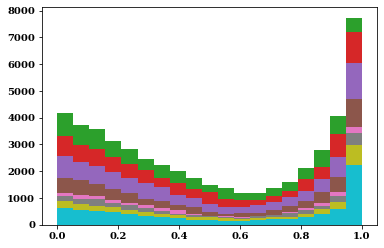

In [137]:
generosity = []
for df in dfs:
    _, bins, _ = plt.hist(df['p'], bins=19);
    generosity.append(np.mean(df[df['p'] >= bins[-2]]['q']))

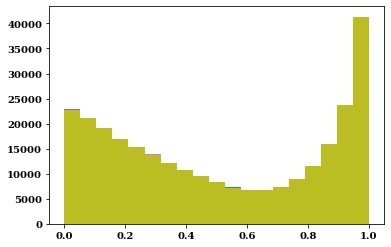

In [133]:
generosity_stoch = []
for df in dfs_stoch:
    _, bins, _ = plt.hist(df['p'], bins=19);
    generosity_stoch.append(np.mean(df[df['p'] >= bins[-2]]['q']))
    

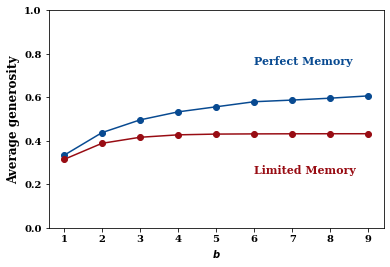

In [173]:
fig, axes = plt.subplots()

axes.plot(range(1, 10), generosity[1:], "-o", color=blues(0.9), label="expected");
axes.plot(range(1, 10), generosity_stoch, "-o", color=reds(.9), label="stochastic");

axes.set_ylabel('Average generosity', weight="bold", fontsize=12);
axes.set_xlabel('$b$', weight="bold");
axes.set_ylim(0, 1);

axes.text(6, .75, "Perfect Memory", fontsize=11, color=blues(.9))
axes.text(6, .25, "Limited Memory", fontsize=11, color=reds(.9))

plt.savefig("../static/generosity_over_b.pdf", bbox_inches='tight')

**Clean based on $\beta$**

In [143]:
betas = [0.01, 0.1, 1, 10, 100]

In [144]:
csv_files = [f'../matlab/data/expected/clean_beta_{beta}_stochastic_0.csv' for beta in betas]

In [145]:
start = 'beta_'

In [153]:
end = "_stochastic"

In [154]:
dfs = []

for file in csv_files:
    df = pd.read_csv(file)
    df['b'] = result = re.search('%s(.*)%s' % (start, end), file).group(1)
    
    dfs.append(df)

In [155]:
points_p = []
points_q = []

for df in dfs:
    ps, qs = [], []
    for p, q, v in zip(df["p"], df["q"], df["frequencies"]):
        for _ in range(int(v)):
            ps.append(p)
            qs.append(q)
            
    points_p.append(ps)
    points_q.append(qs)

In [156]:
heatmaps = []
extents = []
for p, q in zip(points_p, points_q):

    heatmap, xedges, yedges = np.histogram2d(p, q, bins=19)

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    
    heatmaps.append(heatmap)
    extents.append(extent)

In [157]:
min_ = min([heatmap.min() for heatmap in heatmaps])

max_ = max([heatmap.max() for heatmap in heatmaps])

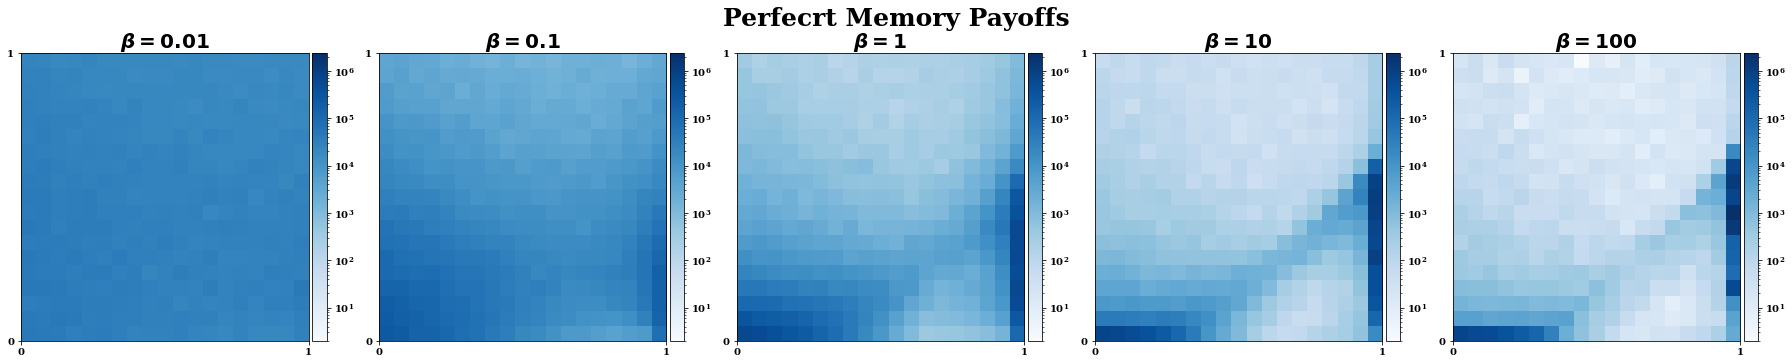

In [158]:
fig, axes = plt.subplots(ncols=5, figsize=(25, 5))

for i, heatmap in enumerate(heatmaps):


    im = axes[i].imshow(heatmap.T, extent=extents[i], origin="lower",
                        cmap=matplotlib.cm.get_cmap("Blues"),  norm=colors.LogNorm(vmin=min_,
                                                                                    vmax=max_))
    
    divider = make_axes_locatable(axes[i])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')
    
    axes[i].set_title(fr"$\beta={dfs[i]['b'].unique()[0]}$", weight="bold", fontsize=20);
    axes[i].set_xticks(np.linspace(0, 1, 2))
    axes[i].set_yticks(np.linspace(0, 1, 2))
    
fig.suptitle('Perfecrt Memory Payoffs', weight="bold", fontsize=25)
plt.tight_layout()

plt.savefig("../static/expected_for_selection_strenght.pdf", bbox_inches='tight')

In [159]:
csv_files_stoch = [f'../matlab/data/stochastic/clean_beta_{b}_stochastic_1.csv' for b in betas]

In [160]:
dfs_stoch = []

for file in csv_files_stoch:
    df = pd.read_csv(file)
    df['b'] = result = re.search('%s(.*)%s' % (start, end), file).group(1)
    
    dfs_stoch.append(df)

In [161]:
points_p = []
points_q = []

for df in dfs_stoch:
    ps, qs = [], []
    for p, q, v in zip(df["p"], df["q"], df["frequencies"]):
        for _ in range(int(v)):
            ps.append(p)
            qs.append(q)
            
    points_p.append(ps)
    points_q.append(qs)

In [162]:
heatmaps = []
extents = []
for p, q in zip(points_p, points_q):

    heatmap, xedges, yedges = np.histogram2d(p, q, bins=19)

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    
    heatmaps.append(heatmap)
    extents.append(extent)

In [163]:
min_ = min([heatmap.min() for heatmap in heatmaps])

max_ = max([heatmap.max() for heatmap in heatmaps])

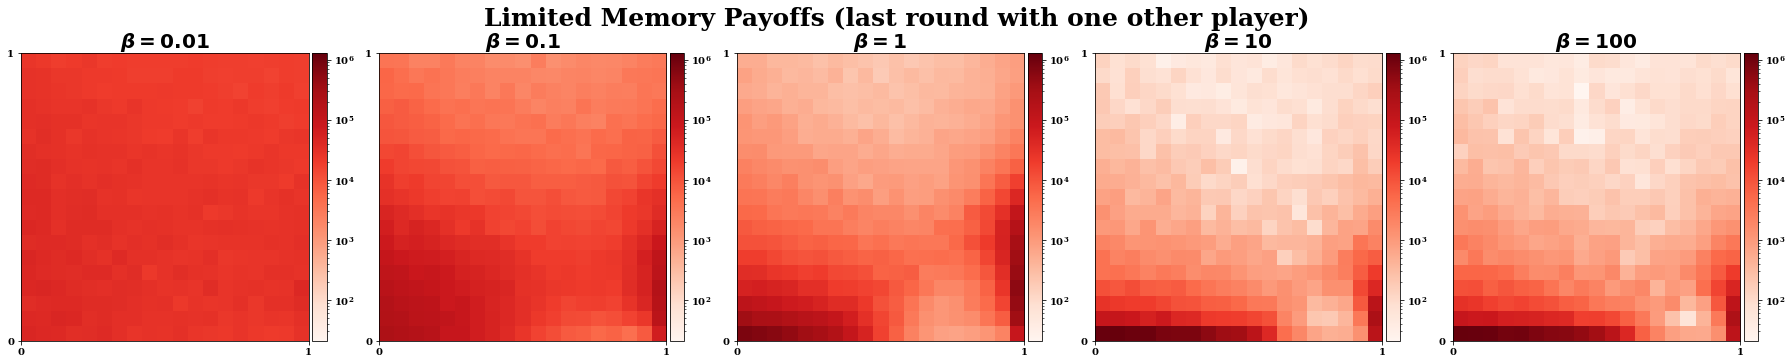

In [166]:
fig, axes = plt.subplots(ncols=5, figsize=(25, 5))

for i, heatmap in enumerate(heatmaps):

    im = axes[i].imshow(heatmap.T, extent=extents[i], origin="lower",
                        cmap=matplotlib.cm.get_cmap("Reds"),
                        norm=colors.LogNorm(vmin=min_,
                                            vmax=max_))
    
    
    divider = make_axes_locatable(axes[i])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')
    
    axes[i].set_title(fr"$\beta={dfs_stoch[i]['b'].unique()[0]}$", weight="bold", fontsize=20);
    axes[i].set_xticks(np.linspace(0, 1, 2))
    axes[i].set_yticks(np.linspace(0, 1, 2))
    
fig.suptitle('Limited Memory Payoffs (last round with one other player)', weight="bold", fontsize=25)


plt.tight_layout()

plt.savefig("../static/stochastic_for_selection_strenght.pdf", bbox_inches='tight')

In [167]:
cooperation_rates = []
cooperation_rates_expected = []

In [168]:
for df in dfs:
    cooperation_rates_expected.append(sum(df['average cooperation rate'] * (df['frequencies'] / 10 ** 7)))

In [169]:
for df in dfs_stoch:
    cooperation_rates.append(sum(df['average cooperation rate'] * (df['frequencies'] / 10 ** 7)))

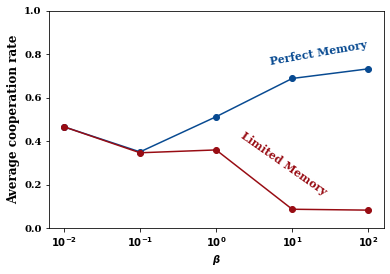

In [198]:
fig, axes = plt.subplots()

axes.plot(range(1, 6), cooperation_rates_expected, "-o", color=blues(0.9));
axes.plot(range(1, 6), cooperation_rates, "-o", color=reds(0.9));

axes.set_ylabel('Average cooperation rate', weight="bold", fontsize=12);
axes.set_xlabel(r'$\beta$', weight="bold");

axes.set_xticks([1, 2, 3, 4, 5]);
axes.set_xticklabels([r"$10^{-2}$", 
                      r"$10^{-1}$", 
                      r"$10^{0}$",
                      r"$10^{1}$", 
                      r"$10^{2}$"]);

axes.set_ylim(0, 1);
axes.text(3.7, .75, "Perfect Memory", fontsize=11, color=blues(.9), rotation=10)
axes.text(3.3, .15, "Limited Memory", fontsize=11, color=reds(.9), rotation=-35)

plt.savefig("../static/cooperation_rate_over_betas.pdf", bbox_inches='tight')

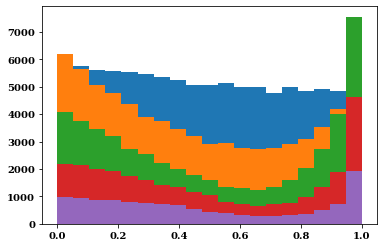

In [199]:
generosity = []
for df in dfs:
    _, bins, _ = plt.hist(df['p'], bins=19);
    generosity.append(np.mean(df[df['p'] >= bins[-2]]['q']))

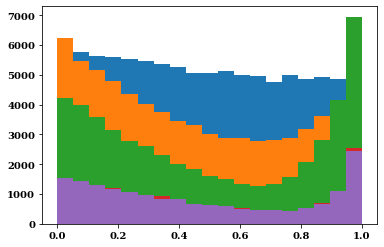

In [200]:
generosity_stoch = []
for df in dfs_stoch:
    _, bins, _ = plt.hist(df['p'], bins=19);
    generosity_stoch.append(np.mean(df[df['p'] >= bins[-2]]['q']))
    

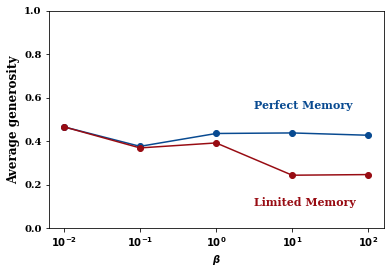

In [212]:
fig, axes = plt.subplots()

axes.plot(range(1, 6), generosity, "-o", color=blues(0.9), label="expected");
axes.plot(range(1, 6), generosity_stoch, "-o", color=reds(.9), label="stochastic");

axes.set_ylabel('Average generosity', weight="bold", fontsize=12);
axes.set_xlabel(r'$\beta$', weight="bold");
axes.set_ylim(0, 1);

axes.text(3.5, .55, "Perfect Memory", fontsize=11, color=blues(.9))
axes.text(3.5, .1, "Limited Memory", fontsize=11, color=reds(.9))

axes.set_xticks([1, 2, 3, 4, 5]);
axes.set_xticklabels([r"$10^{-2}$", 
                      r"$10^{-1}$", 
                      r"$10^{0}$",
                      r"$10^{1}$", 
                      r"$10^{2}$"]);

plt.savefig("../static/generosity_over_betas.pdf", bbox_inches='tight')

In [ ]:
np.lin